<a href="https://colab.research.google.com/github/ququlza/Database/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3 as sl
con = sl.connect('my-test.db')

In [2]:
with con:
  con.execute("""CREATE TABLE USER (
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    age INTEGER
    );
    """)

In [3]:
sql='INSERT INTO USER (id,name,age) values(?, ?, ?)'
data=[(1,'Alice', 21),
      (2,'Bob', 22),
      (3, 'Chris', 23)
      ]

In [4]:
with con:
  con.executemany(sql, data)

In [5]:
with con:
  data= con.execute("SELECT * FROM USER WHERE age <= 22")
  for row in data:
    print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [6]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id': [1,1,2,2,3,3,3],
    'skill': ['Network Security', 'Algorithm Development', 'Network Security', 'Java','Python', 'Data Science','Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [7]:
df_skill.to_sql('SKILL', con)
df = pd.read_sql('''
    SELECT s.user_id, u.name, u.age, s.skill
    FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id
''', con)

df

,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


In [8]:
df.to_sql('USER_SKILL', con)

In [9]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

In [10]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

In [11]:
%sql  SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-09


In [12]:
%sql SELECT date('now', 'start of month','+1 month','-1 day')

 * sqlite:///demo.db3
Done.


"date('now', 'start of month','+1 month','-1 day')"
2022-11-30


In [13]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [14]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

In [15]:
def dt(days):
  return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
  timestamp = now - dt(days=(N_rows -i))
  temperature = uniform(18,26)
  %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

In [16]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-06-27 09:10:55,18.337740817070866
2021-06-28 09:10:55,25.70487684068044
2021-06-29 09:10:55,23.184198884828753
2021-06-30 09:10:55,23.21801781351959
2021-07-01 09:10:55,24.0070339135287


In [17]:
%%sql sqlite://
SELECT Timestamp as Date, temperature
FROM temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-06-27 09:10:55.709492,18.337740817070866
2021-06-28 09:10:55.709492,25.70487684068044
2021-06-29 09:10:55.709492,23.184198884828753
2021-06-30 09:10:55.709492,23.21801781351959
2021-07-01 09:10:55.709492,24.0070339135287
2021-07-02 09:10:55.709492,25.894520927578714
2021-07-03 09:10:55.709492,21.942677600354365
2021-07-04 09:10:55.709492,19.72106741377486
2021-07-05 09:10:55.709492,24.580675024012216
2021-07-06 09:10:55.709492,21.458256753413426


In [18]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE CAST(strftime('%Y', date) as Int) = 2021

Done.


Date,Temperature
2021-06-27 09:10:55.709492,18.337740817070866
2021-06-28 09:10:55.709492,25.70487684068044
2021-06-29 09:10:55.709492,23.184198884828753
2021-06-30 09:10:55.709492,23.21801781351959
2021-07-01 09:10:55.709492,24.0070339135287
2021-07-02 09:10:55.709492,25.894520927578714
2021-07-03 09:10:55.709492,21.942677600354365
2021-07-04 09:10:55.709492,19.72106741377486
2021-07-05 09:10:55.709492,24.580675024012216
2021-07-06 09:10:55.709492,21.458256753413426


In [19]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year,
        AVG(Temperature) AS MEAN_TMP,
        MAX(Temperature) AS MAX_TMP,
        MIN(temperature) AS MIN_TMP
FROM temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,21.87166663869041,25.93491780046226,18.002372523445217
2022,21.965927724342496,25.99246996269525,18.008198724308276


In [20]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM temperature
df = ts.DataFrame()
df.set_index("date", inplace = True)
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-06-27 09:10:55', '2021-06-28 09:10:55',
               '2021-06-29 09:10:55', '2021-06-30 09:10:55',
               '2021-07-01 09:10:55', '2021-07-02 09:10:55',
               '2021-07-03 09:10:55', '2021-07-04 09:10:55',
               '2021-07-05 09:10:55', '2021-07-06 09:10:55',
               ...
               '2022-10-30 09:10:55', '2022-10-31 09:10:55',
               '2022-11-01 09:10:55', '2022-11-02 09:10:55',
               '2022-11-03 09:10:55', '2022-11-04 09:10:55',
               '2022-11-05 09:10:55', '2022-11-06 09:10:55',
               '2022-11-07 09:10:55', '2022-11-08 09:10:55'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

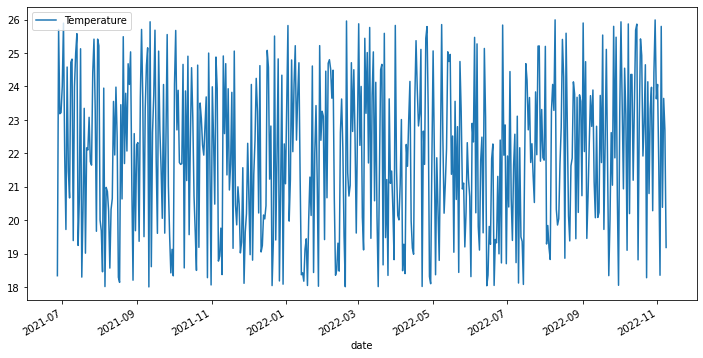

In [21]:
df.plot(figsize=(12, 6))